# Solver

## Config file

In [24]:
from pathlib import Path
import os

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

HERE = Path(os.getcwd()) # Path(__file__) won't work in Jupyter
HERE

PosixPath('/home/hangman/Documents/solver')

In [25]:
with open(HERE / 'config' / 'settings.yaml.bak') as f:
    config = yaml.safe_load(f)
config

{'time_end': 3,
 'time_step': 0.05,
 'f_0': 2,
 'mass': 1.0,
 'viscosity': 1.0,
 'ft_fname': 'f_t.csv',
 'area_fname': 'area.csv'}

In [34]:
new_config = {
    'time_end'  : 3,
    'time_step' : 1,
    'f_0'       : 0,
    'mass'      : 10,
    'viscosity' : 10,
    'ft_fname'  : 'f_t.csv',
    'area_fname': 'area.csv',
}

In [35]:
with open(HERE / 'config' / 'settings.yaml', 'w') as f:
    yaml.dump(new_config, f)

## Simulation

`cargo run` will read `config/settings.yaml` and produce:

- `result/`
  - `<config["area_fname"]>.csv`
  - `<config["ft_fname"]>.csv`

In [36]:
!cargo run

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/solver`
Solver { time_end: 3.0, time_step: 1.0, f_0: 0.0, mass: 10.0, viscosity: 10.0, gravity: 9.8 }

=== Final Values f(3) ===
Analytical solution: 9.312087
Euler method:        9.800000
Trapezoidal method:  8.575000
Runge-Kutta method:  9.283203

=== Integrals ∫f(t)dt from 0 to 3 ===
Analytical integral:           11.126286
Euler ODE + Trap integration:  24.500000
Trap ODE + Trap integration:   16.537500
RK4 ODE + Trap integration:    19.188477



## Plot

In [37]:
def plot_data(df) -> plt:
    plt.plot(
        df["timestamp"], df["analytical"],
        label="analytical",
        color="green"
    )
    plt.plot(
        df["timestamp"], df["euler"],
        label="euler",
        color="blue",
        linestyle="--"
    )
    plt.plot(
        df["timestamp"], df["trapezoid"],
        label="trapezoid",
        color="orange",
        linestyle=":"
    )
    plt.plot(
        df["timestamp"], df["rk4"],
        label="Runge-Kutta",
        color="magenta",
        linestyle=":"
    )
    plt.legend()
    return plt

### $f(t)$ (1st integral)

In [38]:
ft_df = pd.read_csv(
    HERE / "result" / "f_t.csv",
)
ft_df

,timestamp,euler,trapezoid,rk4,analytical
0,0,0.0,0.000,0.000000,0.000000
1,1,9.8,4.900,6.125000,6.194781
2,2,9.8,7.350,8.421875,8.473715
3,3,9.8,8.575,9.283203,9.312087


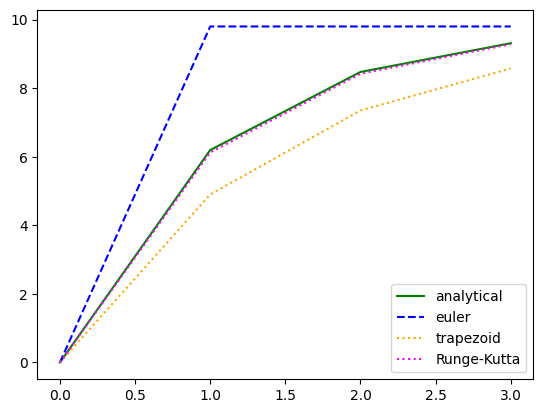

In [39]:
plot_data(ft_df).show()

### area (2nd integral)

In [40]:
area_df = pd.read_csv(
    HERE / "result" / "area.csv",
)
area_df

,timestamp,euler,trapezoid,rk4,analytical
0,0,0.000000,0.0000,0.000000,0.000000
1,1,4.900000,2.4500,3.062500,0.000000
2,2,14.700001,8.5750,10.335938,3.605219
3,3,24.500000,16.5375,19.188477,11.126286


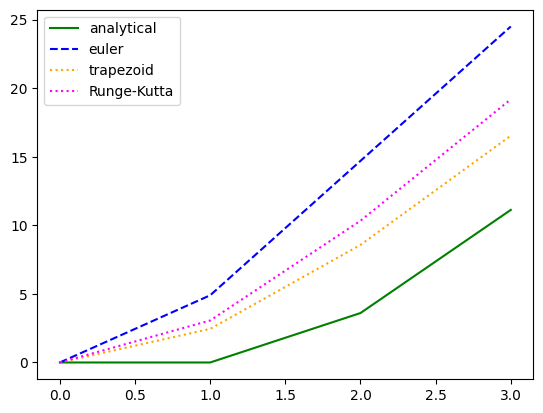

In [41]:
plot_data(area_df).show()